In [1826]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Testing sklearn PCA

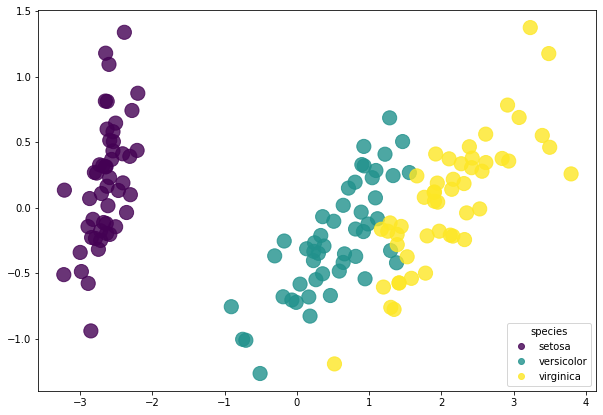

In [1827]:
iris = datasets.load_iris()
X=iris.data
y=iris.target

plt.figure(figsize=(10,7))
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

scat=plt.scatter(X_r[:,0],X_r[:,1],c=y,s=200,alpha=0.8)

plt.legend(handles=scat.legend_elements()[0], labels=iris.target_names.tolist(), title="species")

plt.show()

In [1828]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# my PCA

In [1829]:
def my_PCA(X,n_dims=2,func=np.linalg.eig,**kwargs):
     
    cov=np.cov(X.T)
    
    [w,v]=func(cov,**kwargs)
    
    indexes=w.argsort()[::-1]
    v=v[indexes]
    
    X_r=X.dot(v[:,:n_dims])
    
    center=X.mean(axis=0)
    
    return X_r,w[indexes],v,center


### reverse PCA

In [1830]:
def my_PCA_reverse(X_r,v,n_dims=2):
    
    X=X_r.dot(v[:,:n_dims].T)
    
    return X

### calculate vectors

In [1831]:
def calc_vectors(w,v,center):
    val1=3*np.sqrt(w[0])
    val2=3*np.sqrt(w[1])
    e1=center+v[:,0]
    e2=center+v[:,1]
    v1=val1*np.array([center[0]-e1[0],center[1]-e1[1]])
    v2=val2*np.array([center[0]-e2[0],center[1]-e2[1]])
    
    return v1,v2
    

# Zad1 liczby losowe

In [1832]:
X=np.dot(np.random.randn(2,2), np.random.randn(2,200)).T

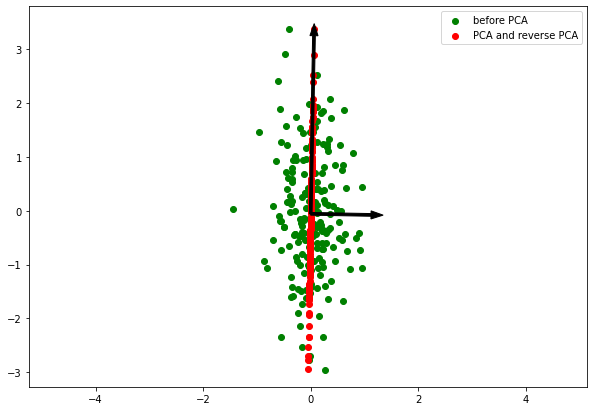

In [1833]:
plt.figure(figsize=(10,7))

X_r,w,v,center=my_PCA(X,n_dims=1)
X_r=my_PCA_reverse(X_r,v,n_dims=1)

plt.scatter(X[:,0],X[:,1],c='green',label='before PCA')
plt.scatter(X_r[:,0],X_r[:,1],c='red',label='PCA and reverse PCA')

v1,v2=calc_vectors(w,v,center)

style={'length_includes_head':False,
       'width':0.05,
       'color':'black'
       }

plt.arrow(x=center[0],y=center[1],dx=v1[0],dy=v1[1],**style)
plt.arrow(x=center[0],y=center[1],dx=v2[0],dy=v2[1],**style)

plt.legend()
plt.axis('equal')
plt.show()


# Zad2 Iris

In [1834]:
iris = datasets.load_iris()
X=iris.data
y=iris.target

In [1835]:
X_r,w,v,center=my_PCA(X,n_dims=2)

### Przestrzeń cech

### wizualizacja obiektów

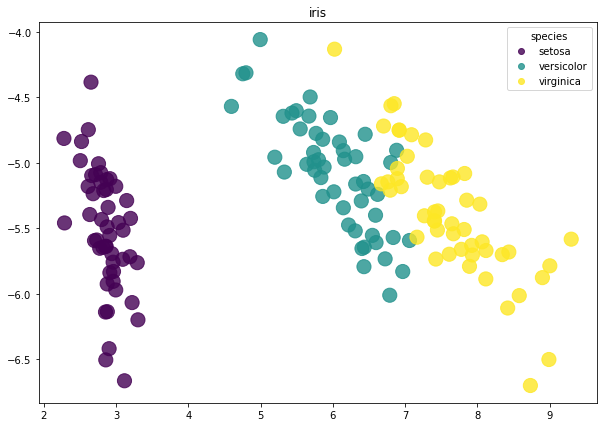

In [1836]:
plt.figure(figsize=(10,7))
scat=plt.scatter(X_r[:,0],X_r[:,1],c=y,s=200,alpha=0.8)

plt.title('iris')
plt.legend(handles=scat.legend_elements()[0], labels=iris.target_names.tolist(), title="species")

plt.show()

### Skumulowana wariancja

[]

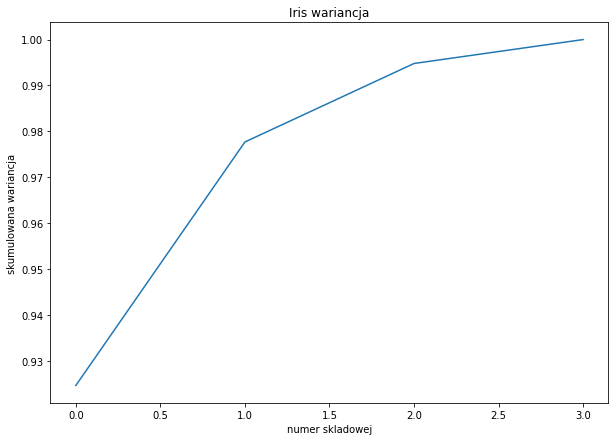

In [1837]:
plt.figure(figsize=(10,7))

vars=w/sum(w)
vars=vars.cumsum()

plt.plot(np.arange(len(vars)),vars)
plt.title('Iris wariancja')
plt.xlabel('numer skladowej')
plt.ylabel('skumulowana wariancja')
plt.plot()

# Zad3 Digits

In [1838]:
digits=datasets.load_digits()
X=digits.data
y=digits.target

X_r,w,v,center=my_PCA(X)

### Przestrzeń cech

### wizualizacja obiektów

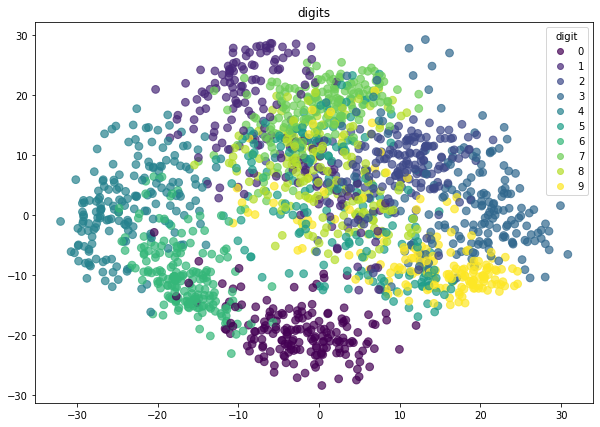

In [1839]:
plt.figure(figsize=(10,7))

scat=plt.scatter(X_r[:,0],X_r[:,1],c=y,s=60,alpha=0.7)

plt.title('digits')
plt.legend(handles=scat.legend_elements()[0], labels=digits.target_names.tolist(), title="digit")
plt.show()

### Skumulowana wariancja

[]

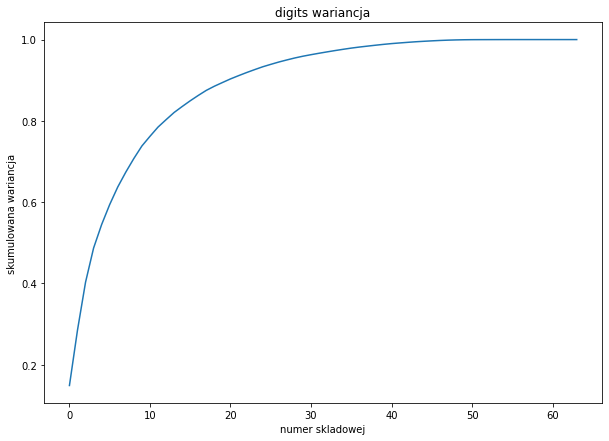

In [1840]:
plt.figure(figsize=(10,7))

vars=w/sum(w)
vars=vars.cumsum()

plt.plot(np.arange(len(vars)),vars)
plt.title('digits wariancja')
plt.xlabel('numer skladowej')
plt.ylabel('skumulowana wariancja')
plt.plot()